In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

destination_col = 'Destination'
start_date_col = 'Start date'
end_date_col = 'End date'
duration_col = 'Duration (days)'
traveler_name_col = 'Traveler name'
traveler_age_col = 'Traveler age'
traveler_gender_col = 'Traveler gender'
traveler_nationality_col = 'Traveler nationality'
accomodation_type_col = 'Accommodation type'
accommodation_cost_col = 'Accommodation cost'
transportation_type_col = 'Transportation type'
transportation_cost_col = 'Transportation cost'

# Trabalho Final (DCC001) - Análise de Dados de Viagens Globais
## Introdução à Programação de Computadores 
### Aluno: José Eduardo Fernandes Lolli


* Dataset: [Traveler-trip-data](https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data)

* Motivação: Aplicar os conhecimentos de análise e manipulação de dados com Python para explorar tendências e padrões a respeito de viagens globais. A motivação vem do interesse pessoal sobre viagens e como fatores geográficos e financeiros se relacionam com as escolhas e a duração de viagens.

-----------------



### Quais são os 10 destinos mais visitados pelos viajantes segundo o dataset?

Segundo os dados do DataSet, o destino com o maior número de viajantes é a cidade de Tokyo, no Japão, sendo seguida de Paris, na França.

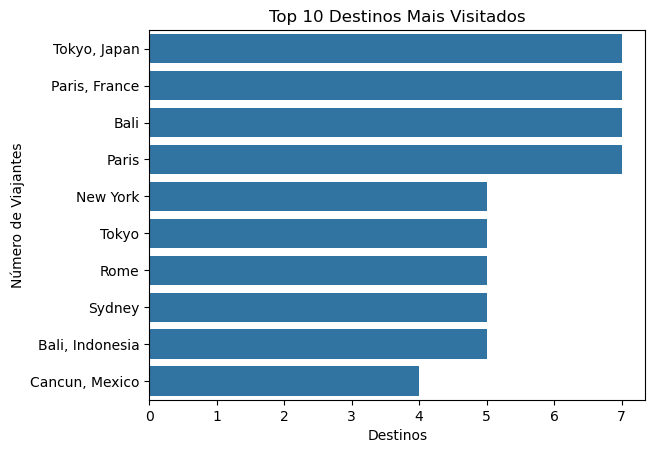

In [141]:
df = pd.read_csv("Travel details dataset.csv")
plt.title('Top 10 Destinos Mais Visitados')
plt.xlabel('Destinos')
plt.ylabel('Número de Viajantes')
top_destinos = df['Destination'].value_counts().head(10)
sns.barplot(y=top_destinos.index, x=top_destinos.values)
plt.show()

-------------------------

### Qual é o meio de transporte mais comum e qual é a relação entre seu custo médio e a duração média da viagem?

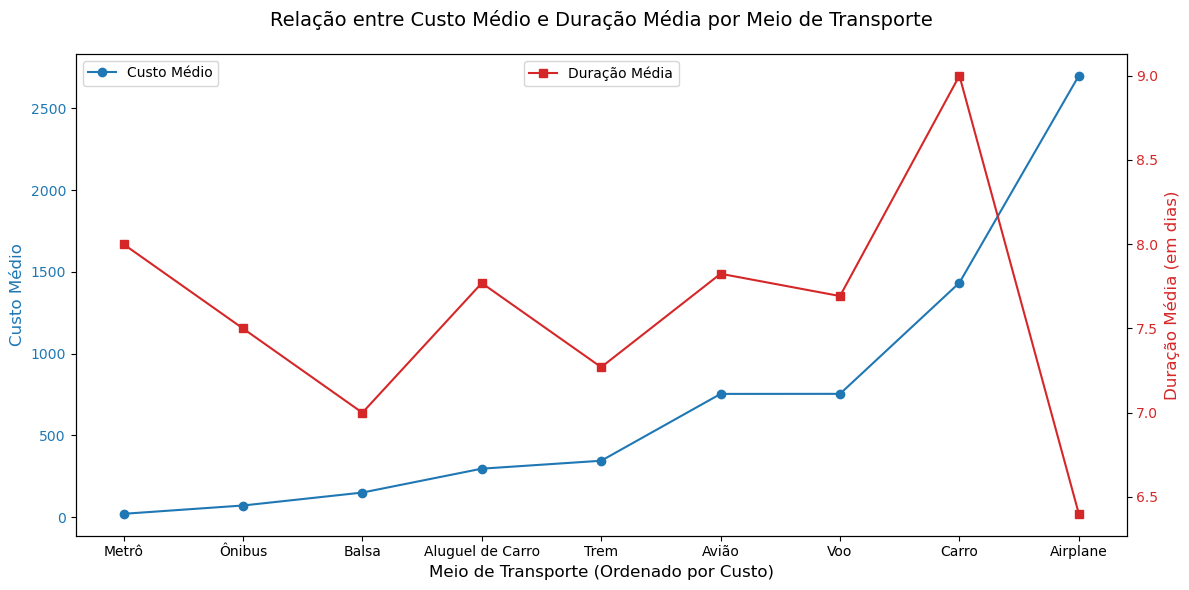

In [142]:
transport_col = 'Transportation type'
cost_col = 'Transportation cost'
duration_col = 'Duration (days)'

df = pd.read_csv('Travel details dataset.csv')

def clean_cost(cost):
    if pd.isna(cost):
        return np.nan
    cleaned_string = re.sub(r'[^\d.]', '', str(cost))
    if not cleaned_string:
        return np.nan
    return float(cleaned_string)

df[cost_col] = df[cost_col].apply(clean_cost)

traducao_valores = {
    'Plane': 'Avião',
    'Flight': 'Voo',
    'Bus': 'Ônibus',
    'Car': 'Carro',
    'Train': 'Trem',
    'Car rental': 'Aluguel de Carro',
    'Subway': 'Metrô',
    'Ferry': 'Balsa'
    
}

df[transport_col] = df[transport_col].replace(traducao_valores)

df_clean = df.dropna(subset=[transport_col, cost_col, duration_col]).copy()

df_medias = df_clean.groupby(transport_col).agg(
    Custo_Medio=(cost_col, 'mean'),
    Duracao_Media=(duration_col, 'mean')
).reset_index()

df_medias_sorted = df_medias.sort_values(by='Custo_Medio', ascending=True).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

color_cost = 'tab:blue'
ax1.set_xlabel('Meio de Transporte (Ordenado por Custo)', fontsize=12)
ax1.set_ylabel('Custo Médio', color=color_cost, fontsize=12)
ax1.plot(df_medias_sorted[transport_col], df_medias_sorted['Custo_Medio'], color=color_cost, marker='o', label='Custo Médio')
ax1.tick_params(axis='y', labelcolor=color_cost)

ax2 = ax1.twinx()

color_duration = 'tab:red'
ax2.set_ylabel('Duração Média (em dias)', color=color_duration, fontsize=12)
ax2.plot(df_medias_sorted[transport_col], df_medias_sorted['Duracao_Media'], color=color_duration, marker='s', label='Duração Média')
ax2.tick_params(axis='y', labelcolor=color_duration)

plt.title('Relação entre Custo Médio e Duração Média por Meio de Transporte', fontsize=14, pad=20)
ax1.legend(loc=2)
ax2.legend(loc=9) 
fig.tight_layout()
plt.show()